# Restaurant Sales Analysis

In [ ]:
import csv
with open('rawDataset.csv', newline='') as f:
    reader = csv.reader(f)
    data1 = list(reader)

In [ ]:
encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(data1)

print(encode_arr)

[[False False False ... False False False]
 [ True False False ...  True  True False]
 [False False False ...  True False False]
 ...
 [ True False False ...  True  True False]
 [ True False False ...  True  True  True]
 [False False False ... False  True  True]]


In [ ]:
encode_df1=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df1

,,1000Rs,1001Rs,1002Rs,1003Rs,1004Rs,1005Rs,1006Rs,1007Rs,1008Rs,...,ORDX9993,ORDX9994,ORDX9995,ORDX9996,ORDX9997,ORDX9998,ORDX9999,Plain Rice,Special Fried Rice,Vindaloo - Prawn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
10996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10997,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
10998,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [ ]:
md=mlxtend.frequent_patterns.apriori(encode_df1)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df1,
                                           min_support=0.01,
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.450273,( )
1,0.455000,(Bhuna - Chicken)
2,0.448545,(Chicken Tikka Balti)
3,0.462909,(Curry)
4,0.456455,(House white wine 75cl)
5,0.441091,(Korma - Lamb)
6,0.457727,(Lamb Biryani)
7,0.463091,(Plain Rice)
8,0.462000,(Special Fried Rice)
9,0.451364,(Vindaloo - Prawn)


In [ ]:
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="confidence",min_threshold=0.06,support_only=False)

rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( ),(Bhuna - Chicken),0.450273,0.455000,0.204818,0.454876,0.999727,-0.000056,0.999772
1,(Bhuna - Chicken),( ),0.455000,0.450273,0.204818,0.450150,0.999727,-0.000056,0.999777
2,( ),(Chicken Tikka Balti),0.450273,0.448545,0.207091,0.459923,1.025366,0.005123,1.021067
3,(Chicken Tikka Balti),( ),0.448545,0.450273,0.207091,0.461694,1.025366,0.005123,1.021218
4,( ),(Curry),0.450273,0.462909,0.212909,0.472845,1.021464,0.004474,1.018848
5,(Curry),( ),0.462909,0.450273,0.212909,0.459937,1.021464,0.004474,1.017895
6,( ),(House white wine 75cl),0.450273,0.456455,0.208091,0.462144,1.012465,0.002562,1.010578
7,(House white wine 75cl),( ),0.456455,0.450273,0.208091,0.455885,1.012465,0.002562,1.010315
8,(Korma - Lamb),( ),0.441091,0.450273,0.203000,0.460223,1.022097,0.004389,1.018433
9,( ),(Korma - Lamb),0.450273,0.441091,0.203000,0.450838,1.022097,0.004389,1.017749


In [ ]:
rules2=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="lift",min_threshold=0.06,support_only=False)

rules2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( ),(Bhuna - Chicken),0.450273,0.455000,0.204818,0.454876,0.999727,-0.000056,0.999772
1,(Bhuna - Chicken),( ),0.455000,0.450273,0.204818,0.450150,0.999727,-0.000056,0.999777
2,( ),(Chicken Tikka Balti),0.450273,0.448545,0.207091,0.459923,1.025366,0.005123,1.021067
3,(Chicken Tikka Balti),( ),0.448545,0.450273,0.207091,0.461694,1.025366,0.005123,1.021218
4,( ),(Curry),0.450273,0.462909,0.212909,0.472845,1.021464,0.004474,1.018848
5,(Curry),( ),0.462909,0.450273,0.212909,0.459937,1.021464,0.004474,1.017895
6,( ),(House white wine 75cl),0.450273,0.456455,0.208091,0.462144,1.012465,0.002562,1.010578
7,(House white wine 75cl),( ),0.456455,0.450273,0.208091,0.455885,1.012465,0.002562,1.010315
8,(Korma - Lamb),( ),0.441091,0.450273,0.203000,0.460223,1.022097,0.004389,1.018433
9,( ),(Korma - Lamb),0.450273,0.441091,0.203000,0.450838,1.022097,0.004389,1.017749


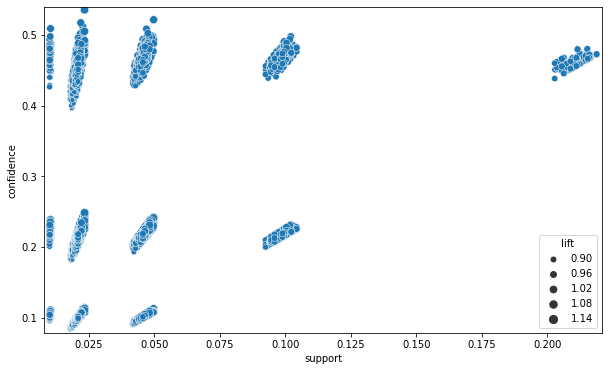

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence",
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

The two plots above are very different from each other. The first plot from the groceries market analysis is scattered and more concentrated where the support is 0.1.
The second plot from the restaurant analysis is more clustered at different points of confidence and support.